In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
submission=pd.read_csv('submission.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,0.0,0.0,31885,9000.0,2,0,0,0.0,SUV
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,1.0,0.0,32277,10000.0,0,0,0,1.0,Sedan
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,1.0,0.0,34800,11000.0,0,0,0,1.0,Sedan
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,0.0,HatchBack


In [4]:
train['ID'].drop_duplicates(keep='first',inplace=True)
test['ID'].drop_duplicates(keep='first',inplace=True)

In [5]:
train

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,0.0,0.0,31885,9000.0,2,0,0,0.0,SUV
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,1.0,0.0,32277,10000.0,0,0,0,1.0,Sedan
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,1.0,0.0,34800,11000.0,0,0,0,1.0,Sedan
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,0.0,HatchBack


In [6]:
train.drop(['ID','POSTAL_CODE'],axis=1,inplace=True)
test.drop(['ID','POSTAL_CODE'],axis=1,inplace=True)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  45000 non-null  object 
 1   GENDER               45000 non-null  object 
 2   DRIVING_EXPERIENCE   45000 non-null  object 
 3   EDUCATION            45000 non-null  object 
 4   INCOME               45000 non-null  object 
 5   CREDIT_SCORE         45000 non-null  float64
 6   VEHICLE_OWNERSHIP    45000 non-null  float64
 7   VEHICLE_YEAR         45000 non-null  object 
 8   MARRIED              45000 non-null  float64
 9   CHILDREN             45000 non-null  float64
 10  ANNUAL_MILEAGE       45000 non-null  float64
 11  SPEEDING_VIOLATIONS  45000 non-null  int64  
 12  DUIS                 45000 non-null  int64  
 13  PAST_ACCIDENTS       45000 non-null  int64  
 14  TYPE_OF_VEHICLE      45000 non-null  object 
dtypes: float64(5), int64(3), object(7)
m

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  105000 non-null  object 
 1   GENDER               105000 non-null  object 
 2   DRIVING_EXPERIENCE   105000 non-null  object 
 3   EDUCATION            105000 non-null  object 
 4   INCOME               105000 non-null  object 
 5   CREDIT_SCORE         105000 non-null  float64
 6   VEHICLE_OWNERSHIP    105000 non-null  float64
 7   VEHICLE_YEAR         105000 non-null  object 
 8   MARRIED              105000 non-null  float64
 9   CHILDREN             105000 non-null  float64
 10  ANNUAL_MILEAGE       105000 non-null  float64
 11  SPEEDING_VIOLATIONS  105000 non-null  int64  
 12  DUIS                 105000 non-null  int64  
 13  PAST_ACCIDENTS       105000 non-null  int64  
 14  OUTCOME              105000 non-null  float64
 15  TYPE_OF_VEHICLE  

In [9]:
train.isnull().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [10]:
test.isnull().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
TYPE_OF_VEHICLE        0
dtype: int64

In [11]:
train["AGE"].replace(['40-64', '26-39', '16-25', '65+'],[3,2,1,4],inplace=True)
test["AGE"].replace(['40-64', '26-39', '16-25', '65+'],[3,2,1,4],inplace=True)
train["GENDER"].replace(['female', 'male'],[0,1],inplace=True)
test["GENDER"].replace(['female', 'male'],[0,1],inplace=True)
train["DRIVING_EXPERIENCE"].replace(['20-29y', '30y+', '0-9y', '10-19y'],[3,4,1,2],inplace=True)
test["DRIVING_EXPERIENCE"].replace(['20-29y', '30y+', '0-9y', '10-19y'],[3,4,1,2],inplace=True)
train["EDUCATION"].replace(['university', 'high school', 'none'],[1,2,3],inplace=True)
test["EDUCATION"].replace(['university', 'high school', 'none'],[1,2,3],inplace=True)
train["INCOME"].replace(['middle class', 'upper class', 'working class', 'poverty'],[3,1,2,4],inplace=True)
test["INCOME"].replace(['middle class', 'upper class', 'working class', 'poverty'],[3,1,2,4],inplace=True)
train["VEHICLE_YEAR"].replace(['after 2015', 'before 2015'],[2,1],inplace=True)
test["VEHICLE_YEAR"].replace(['after 2015', 'before 2015'],[2,1],inplace=True)
train["TYPE_OF_VEHICLE"].replace(['Sports Car', 'HatchBack', 'Sedan', 'SUV'],[1,2,3,4],inplace=True)
test["TYPE_OF_VEHICLE"].replace(['Sports Car', 'HatchBack', 'Sedan', 'SUV'],[1,2,3,4],inplace=True)
train = train.astype({"VEHICLE_OWNERSHIP":int,"MARRIED":int,"CHILDREN":int,"OUTCOME":int})
test = test.astype({"VEHICLE_OWNERSHIP":int,"MARRIED":int,"CHILDREN":int})

In [12]:
# Encoding test data features
le=LabelEncoder()
train['GENDER']=le.fit_transform(train['GENDER'])
train['EDUCATION']=le.fit_transform(train['EDUCATION'])
train['VEHICLE_YEAR']=le.fit_transform(train['VEHICLE_YEAR'])
train['AGE']=le.fit_transform(train['AGE'])
train['DRIVING_EXPERIENCE']=le.fit_transform(train['DRIVING_EXPERIENCE'])
train['INCOME']=le.fit_transform(train['INCOME'])
train['TYPE_OF_VEHICLE']=le.fit_transform(train['TYPE_OF_VEHICLE'])

# Encoding test data features
le1=LabelEncoder()
test['GENDER']=le1.fit_transform(test['GENDER'])
test['EDUCATION']=le1.fit_transform(test['EDUCATION'])
test['VEHICLE_YEAR']=le1.fit_transform(test['VEHICLE_YEAR'])
test['AGE']=le1.fit_transform(test['AGE'])
test['DRIVING_EXPERIENCE']=le1.fit_transform(test['DRIVING_EXPERIENCE'])
test['INCOME']=le1.fit_transform(test['INCOME'])
test['TYPE_OF_VEHICLE']=le1.fit_transform(test['TYPE_OF_VEHICLE'])

In [13]:
train = train.drop(['EDUCATION'],axis=1)
test = test.drop(['EDUCATION'],axis=1)

In [14]:
train = train.drop(['CREDIT_SCORE'],axis=1)
test = test.drop(['CREDIT_SCORE'],axis=1)

In [15]:
train = train.drop(['ANNUAL_MILEAGE'],axis=1)
test = test.drop(['ANNUAL_MILEAGE'],axis=1)

In [16]:
train = train.drop(['DUIS'],axis=1)
test = test.drop(['DUIS'],axis=1)

In [17]:
train = train.drop(['TYPE_OF_VEHICLE'],axis=1)
test = test.drop(['TYPE_OF_VEHICLE'],axis=1)

In [18]:
train = train.drop(['VEHICLE_OWNERSHIP'],axis=1)
test = test.drop(['VEHICLE_OWNERSHIP'],axis=1)

In [19]:
train

,AGE,GENDER,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,OUTCOME
0,2,0,2,2,1,0,0,0,0,0
1,1,1,2,2,0,1,0,0,0,1
2,2,1,2,2,0,1,1,0,0,1
3,2,1,2,0,0,0,1,1,0,1
4,2,0,2,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
104995,3,0,0,0,0,0,0,2,0,0
104996,2,0,0,1,1,1,0,0,0,1
104997,0,1,1,0,1,1,0,0,0,1
104998,2,0,2,1,0,0,0,0,0,0


<AxesSubplot:xlabel='VEHICLE_YEAR', ylabel='OUTCOME'>

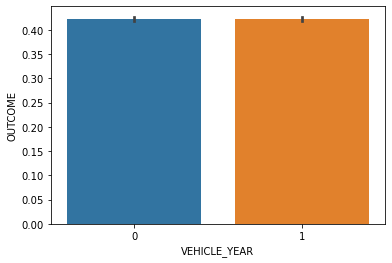

In [33]:
sns.barplot(y=train['OUTCOME'],x=train['VEHICLE_YEAR'])

C:\Users\antony.a\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\antony.a\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GENDER', ylabel='OUTCOME'>

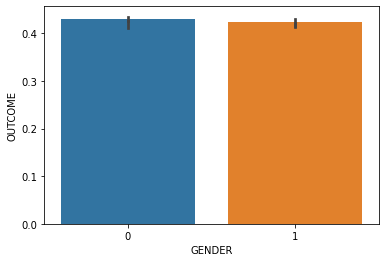

In [34]:
sns.barplot(train['AGE'],train['OUTCOME'])
sns.barplot(train['GENDER'],train['OUTCOME'])

In [36]:
from sklearn.model_selection import train_test_split
y=train['OUTCOME']
X=train.drop('OUTCOME',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.001,random_state=42)

In [37]:
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test=standard.fit_transform(X_test)

In [38]:
# Model 1

In [39]:
model1 = RandomForestClassifier(random_state = 42,n_estimators=100,criterion='entropy',class_weight='balanced',max_features='sqrt')
model1.fit(X_train,y_train) 

print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')

Accuracy of Random Forest Classifier on training set: 0.62
Accuracy of Random Forest Classifier on test set: 0.43
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.48      0.55      0.52        58
           1       0.33      0.28      0.30        47

    accuracy                           0.43       105
   macro avg       0.41      0.41      0.41       105
weighted avg       0.42      0.43      0.42       105
 



In [ ]:
# Model 2

In [40]:
model2 = GradientBoostingClassifier(random_state = 42,n_estimators=100,loss='deviance',max_depth=8,learning_rate=0.5)
model2.fit(X_train,y_train) 

print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')

Accuracy of Random Forest Classifier on training set: 0.63
Accuracy of Random Forest Classifier on test set: 0.50
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.53      0.88      0.66        58
           1       0.22      0.04      0.07        47

    accuracy                           0.50       105
   macro avg       0.38      0.46      0.37       105
weighted avg       0.39      0.50      0.40       105
 



In [ ]:
# model 4

In [41]:
model4 = HistGradientBoostingClassifier(random_state=42,learning_rate=0.5)
model4.fit(X_train,y_train) 

print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model4.predict(X_test)),'\n')

Accuracy of Random Forest Classifier on training set: 0.58
Accuracy of Random Forest Classifier on test set: 0.54
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.55      0.97      0.70        58
           1       0.33      0.02      0.04        47

    accuracy                           0.54       105
   macro avg       0.44      0.49      0.37       105
weighted avg       0.45      0.54      0.40       105
 



In [ ]:
# Model 3

In [26]:
model3 = MLPClassifier(random_state=42,activation='logistic')
model3.fit(X_train,y_train) 

print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')

Accuracy of Random Forest Classifier on training set: 0.58
Accuracy of Random Forest Classifier on test set: 0.55
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.55      1.00      0.71        58
           1       0.00      0.00      0.00        47

    accuracy                           0.55       105
   macro avg       0.28      0.50      0.36       105
weighted avg       0.31      0.55      0.39       105
 



C:\Users\antony.a\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antony.a\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antony.a\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict_proba(x)

# Prediction using Model 2
y_pred2 = model2.predict_proba(x)

# Prediction using Model 3
y_pred3 = model3.predict_proba(x)

# Prediction using Model 4
y_pred4 = model4.predict_proba(x)

# Final Prediction using Ensemble Technique
predictions = list()
cb_weight=0.25 
lb_weight=0.25 
mb_weight=0.25
xb_weight=0.25

for i, j, k, m in zip(y_pred1, y_pred2,y_pred3,y_pred4):
    xx = (cb_weight * i[0]) + (lb_weight * j[0]) + (mb_weight * k[0])+ (xb_weight * m[0])
    predictions.append(xx)

data= predictions

print("Result of Ensemble Technique used for Submission")

Result of Ensemble Technique used for Submission


In [59]:
sub=pd.DataFrame(data,columns=['OUTCOME'])

In [60]:
sub.to_csv('submission1.csv',index=False)